In [125]:
# Audio processing starts here!
from pydub import AudioSegment

# "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/bats/Nyctalus_noctula_2_o.wav"
# "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/bats/Myotis_bechsteinii_2_n.wav"
# "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/bats/Nyctalus_leisleri_4_o.wav"
# "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/bats/Pipistrellus_nathusii_1_o.wav"
# "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/bats/Pipistrellus_pipistrellus_2_o.wav


myPath = dict()
myPath = "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/bats/sunday.wav"
sound = AudioSegment.from_wav( myPath )

/home/tegwyn/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


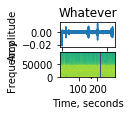

In [126]:
import matplotlib.pyplot as plot
from scipy.io import wavfile
# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read(myPath)

# Plot the signal read from wav file
plot.rcParams['figure.figsize'] = [1, 1]
plot.subplot(211)

plot.title('Whatever')

plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')


plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time, seconds')
plot.ylabel('Frequency')

plot.show()

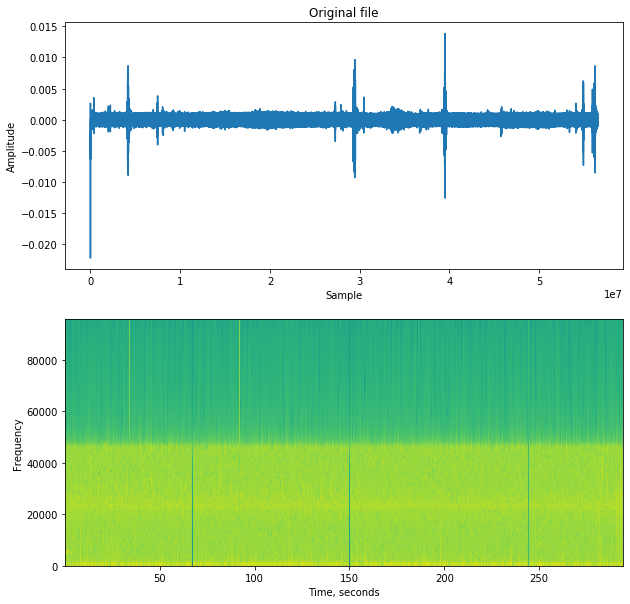

In [127]:
import matplotlib.pyplot as plot
from scipy.io import wavfile
# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read(myPath)

# Plot the signal read from wav file
plot.rcParams['figure.figsize'] = [10, 10]
plot.subplot(211)

plot.title('Original file')

plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')


plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time, seconds')
plot.ylabel('Frequency')

plot.show()

In [129]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os
import glob

chunks = split_on_silence(sound, 
    # must be silent for at least ... milliseconds
    min_silence_len= 4,
    silence_thresh= -55                  # Very sensitive to this value !!!!!!
)
l = len(chunks)
print("Number of chunks: ",l)
for i, chunk in enumerate(chunks):
    chunk.export("/media/tegwyn/Xavier_SD/Bat_Detecter/test01/chunk{0}.wav".format(i), format="wav")

Number of chunks:  21


/home/tegwyn/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


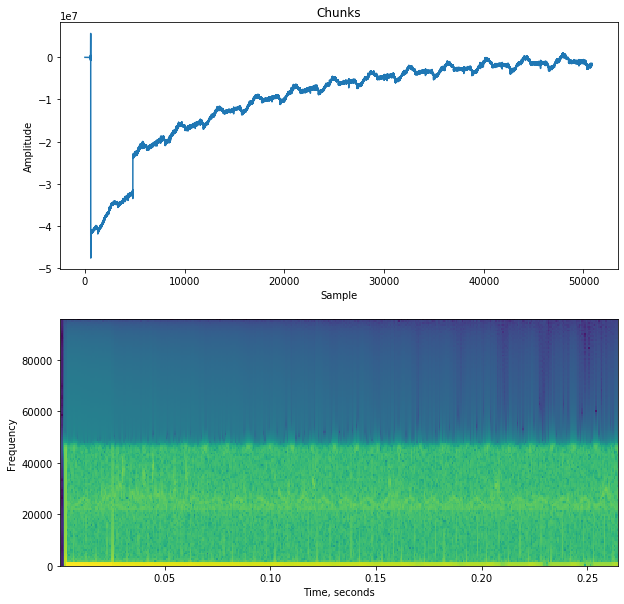

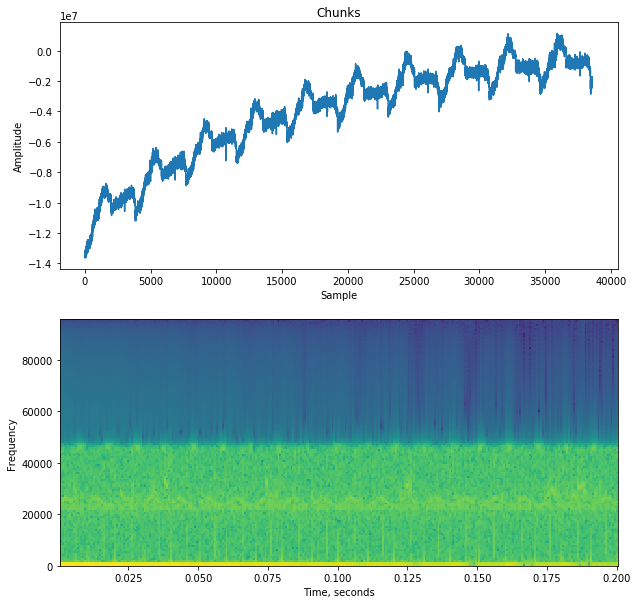

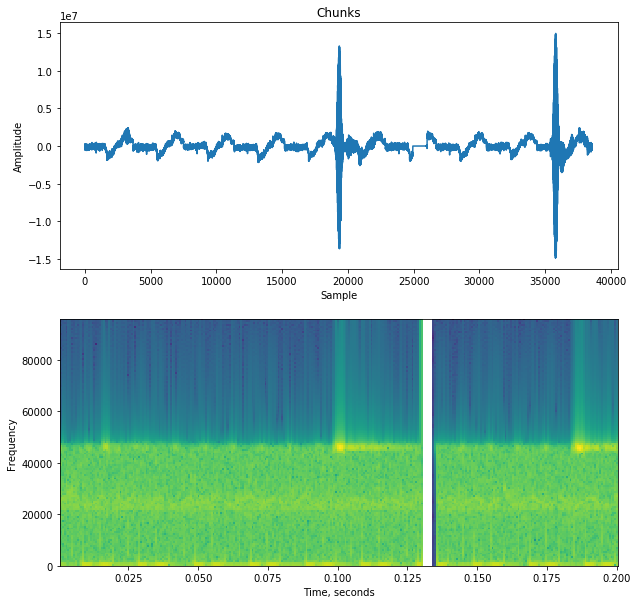

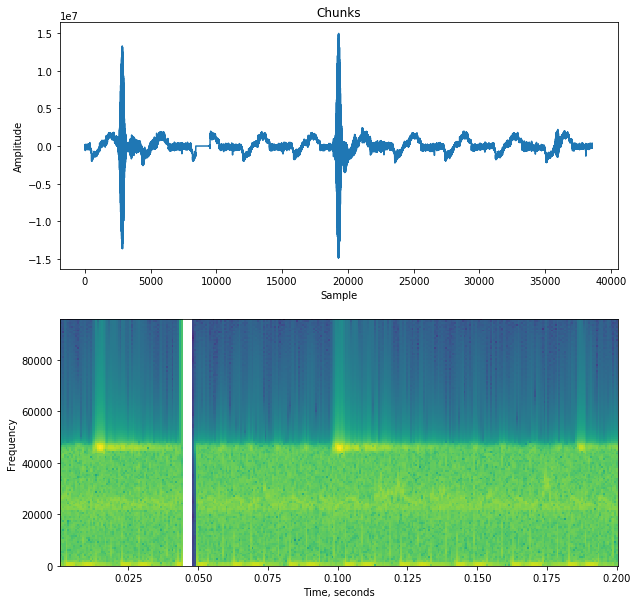

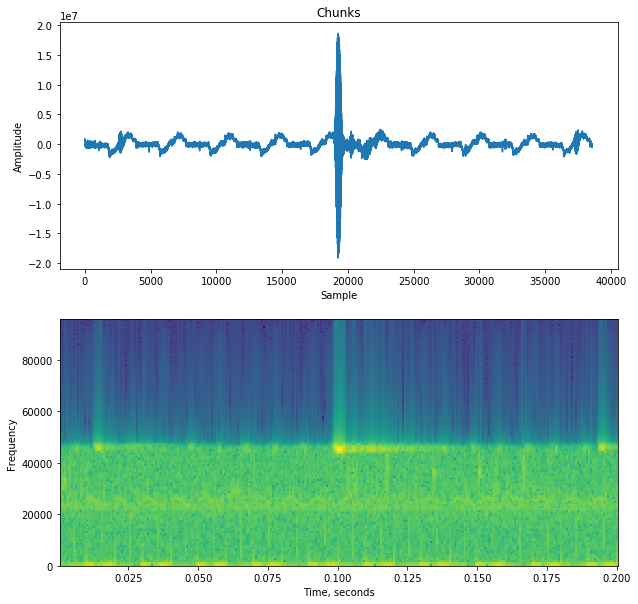

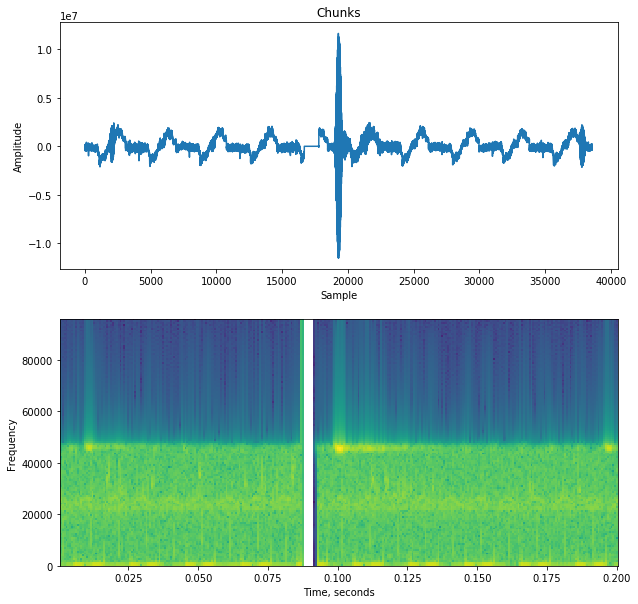

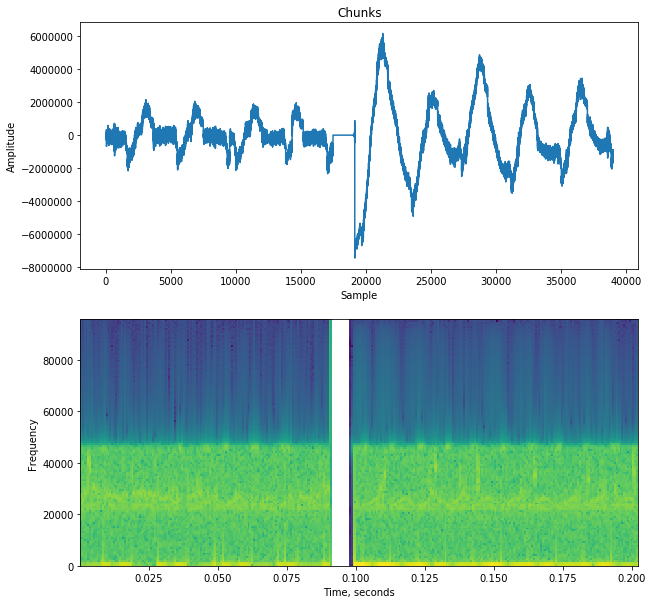

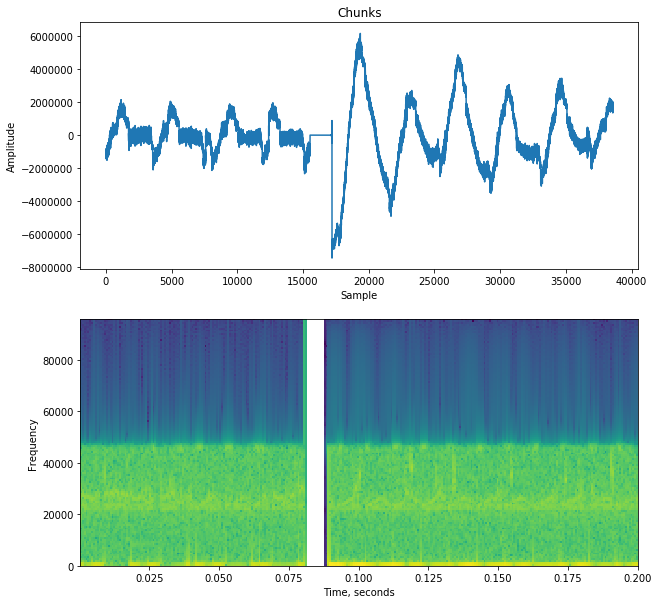

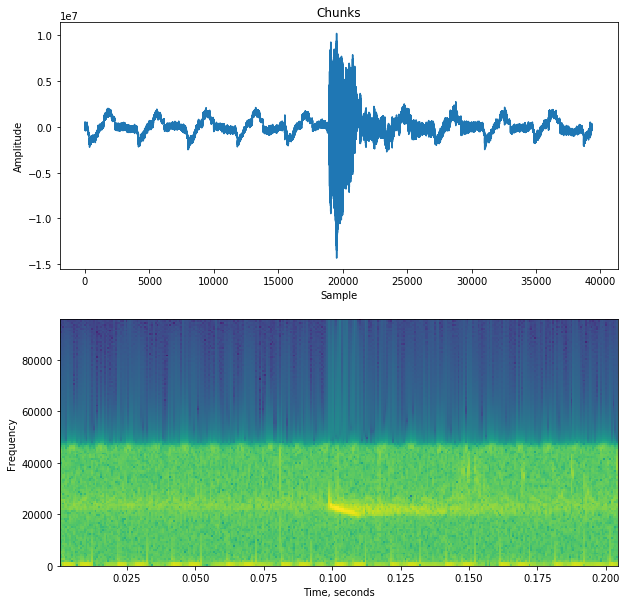

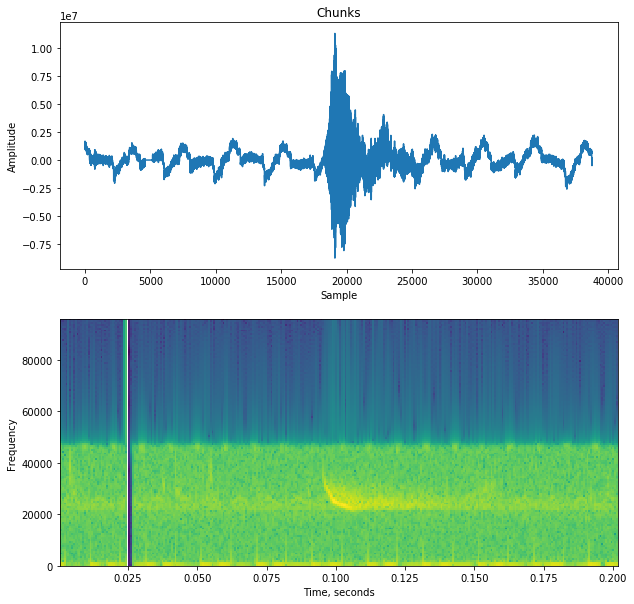

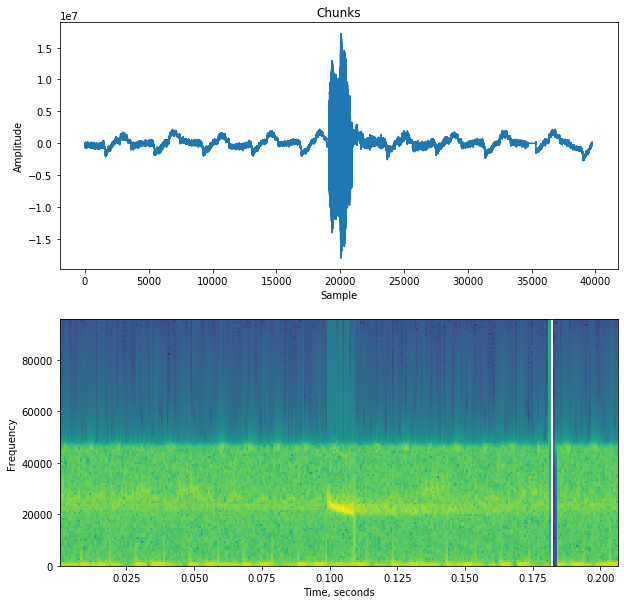

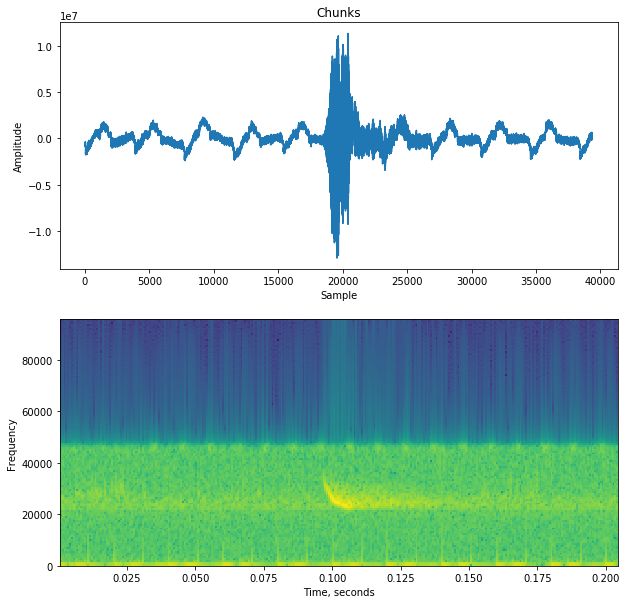

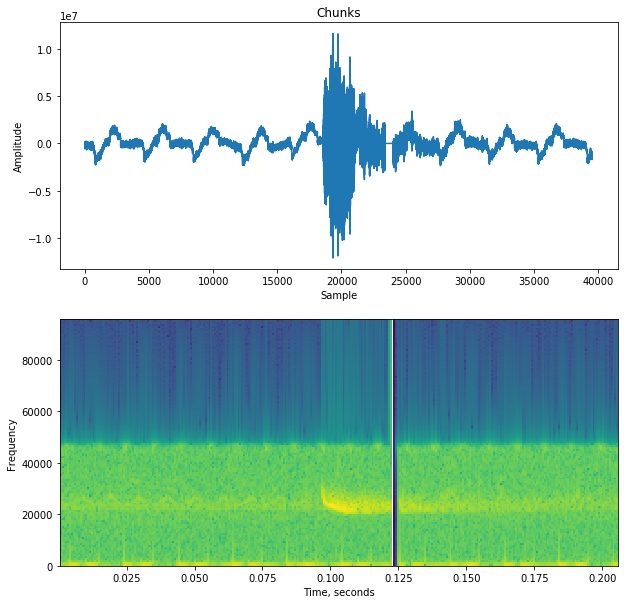

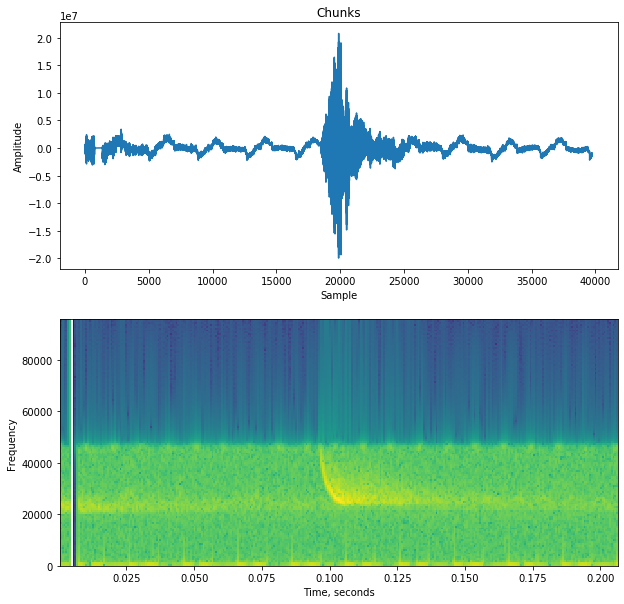

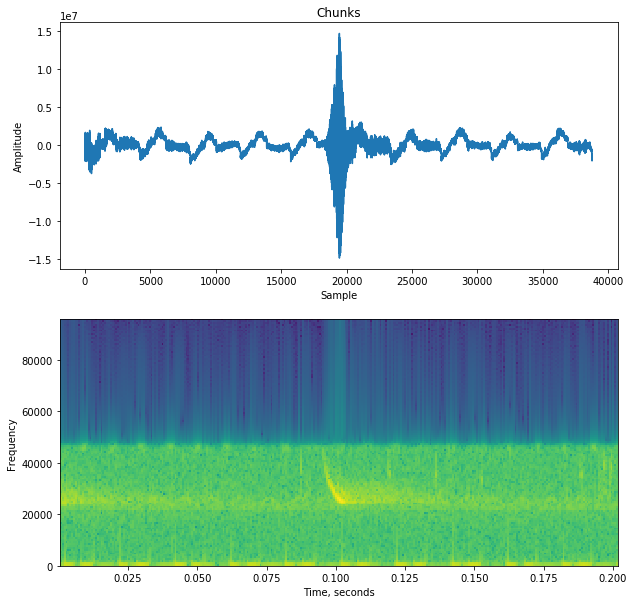

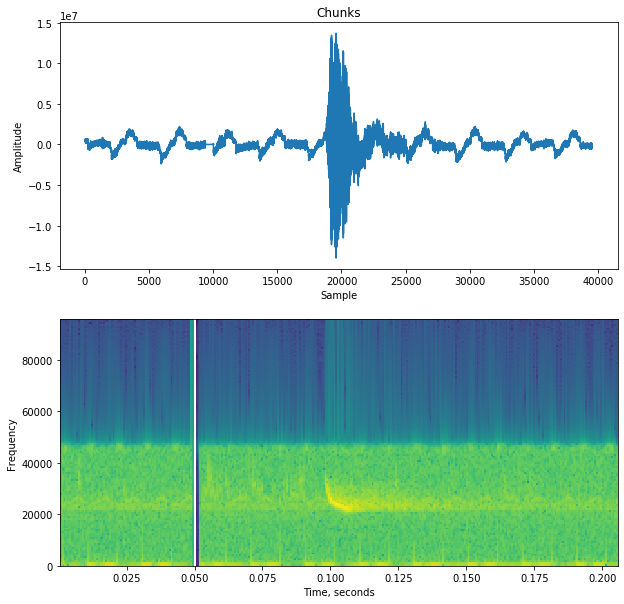

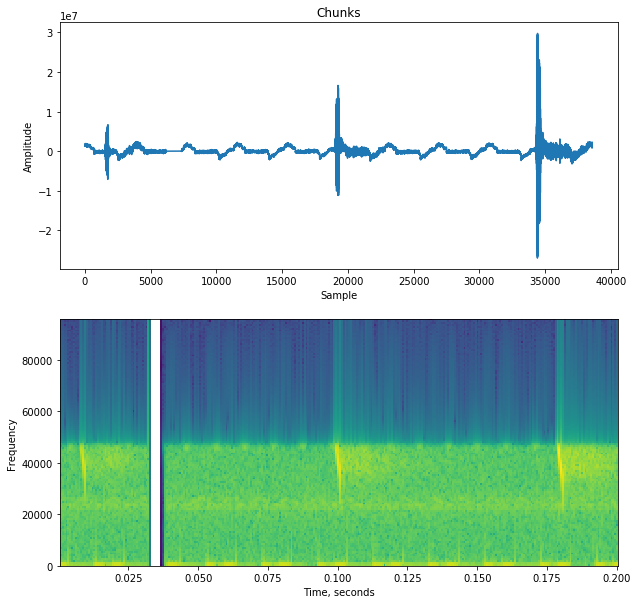

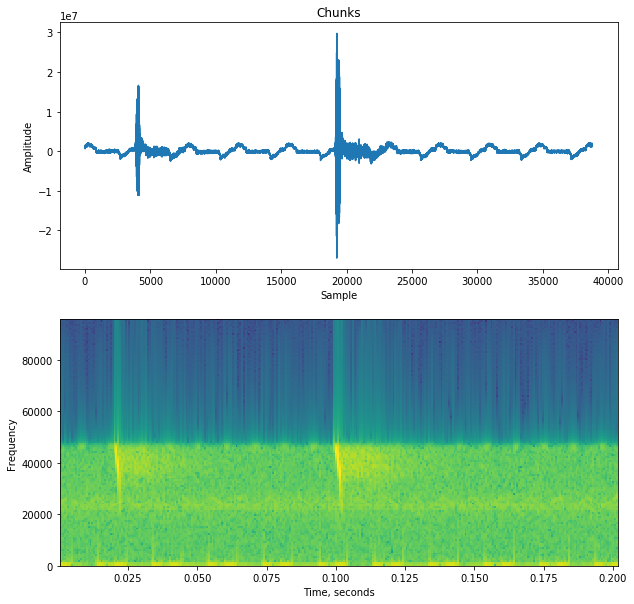

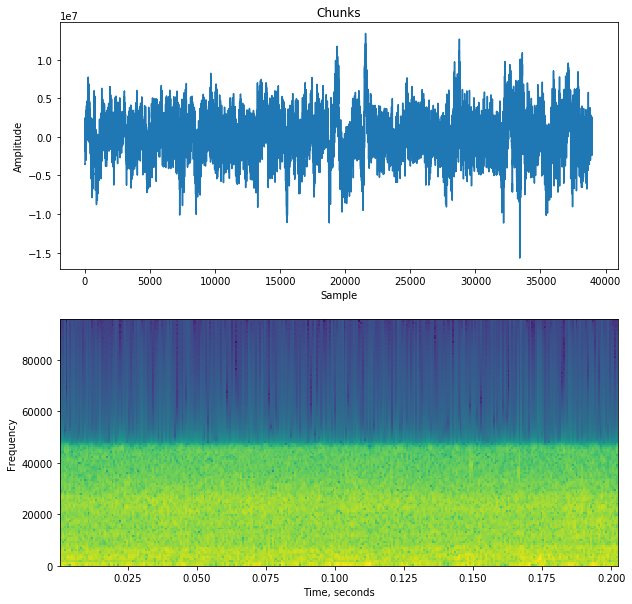

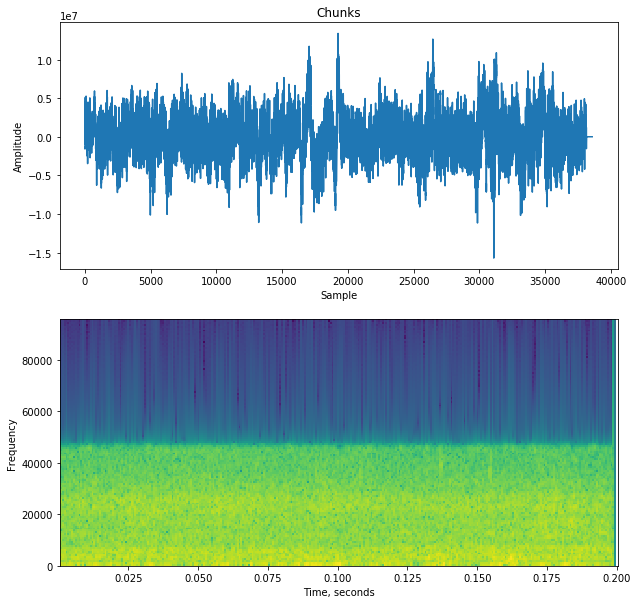

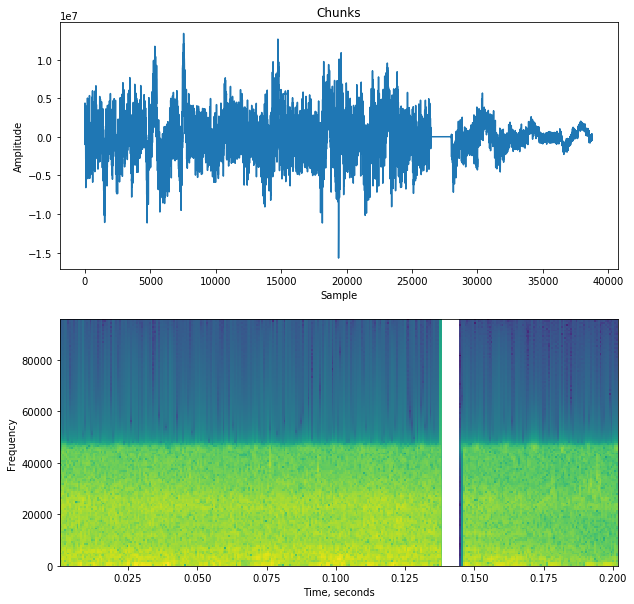

In [131]:
for i in range (l):
    z = str(i)
    fileToLoad = dict()
    fileToLoad = "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/chunk" + str(i) + ".wav"
    # print(fileToLoad)
    if i > -1:
        #samplingFrequency, signalData = wavfile.read('/media/tegwyn/Xavier_SD/Bat_Detecter/test01/processed3')
        samplingFrequency, signalData = wavfile.read(
            fileToLoad
            )

        # Plot the signal read from wav file
        plot.rcParams['figure.figsize'] = [10, 10]
        
        plot.subplot(211)

        plot.title('Chunks')

        plot.plot(signalData)
        plot.xlabel('Sample')
        plot.ylabel('Amplitude')


        plot.subplot(212)

        plot.specgram(signalData,Fs=samplingFrequency)
        plot.xlabel('Time, seconds')
        plot.ylabel('Frequency')

        plot.show()

In [99]:
from pydub import AudioSegment

def detect_leading_silence(sound, silence_threshold=-35.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

In [100]:
import os
import glob
from pydub import AudioSegment
from pydub.utils import db_to_float
import re

audio_dir = '/media/tegwyn/Xavier_SD/Bat_Detecter/test01/'  # Path where the calls are located
os.chdir(audio_dir)

duo = dict()
processed = dict()

for i in range (l):
    
    x = "chunk" + str(i-1) + ".wav"
    y = "chunk" + str(i) + ".wav"
    z = str(i)
    
    processed[z] = "processed" + str(i)

    if i > 0:
        duo[z] = AudioSegment.from_wav(x) + AudioSegment.from_wav(y)
        
        start_trim = detect_leading_silence(duo[z])
        end_trim = detect_leading_silence(duo[z].reverse())

        duration = len(duo[z])    
        trimmed_sound = duo[z][start_trim:duration-end_trim]
        duo[z] = trimmed_sound
        # save the results
        duo[z].export(processed[z], format="wav")

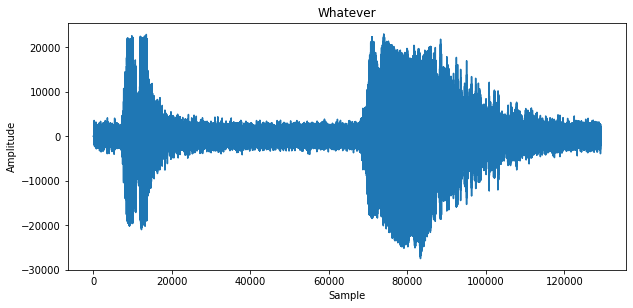

In [110]:
import matplotlib.pyplot as plot
from scipy.io import wavfile
# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('/media/tegwyn/Xavier_SD/Bat_Detecter/test01/processed1')
# samplingFrequency, signalData = wavfile.read('/media/tegwyn/Xavier_SD/Bat_Detecter/test01/played_together3.wav')

# Plot the signal read from wav file
plot.rcParams['figure.figsize'] = [10,10]
plot.subplot(211)

plot.title('Whatever')

plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')


# plot.subplot(212)

# plot.specgram(signalData,Fs=samplingFrequency)
# plot.xlabel('Time, seconds')
# plot.ylabel('Frequency')

plot.show()

In [102]:
# Overlay with 350 ms silence:
for i in range (l):
    z = str(i)
    y = "played_together" + str(i) + ".wav"
    
    if i > 0:
        sound2 = AudioSegment.from_file( processed[z] , channels=1 )
        sound1 = AudioSegment.from_file("350ms_silence.wav" , channels=1 )

        played_together = sound1.overlay(sound2)
        played_together = played_together.set_channels(1)
        played_together.export(y, format="wav" )

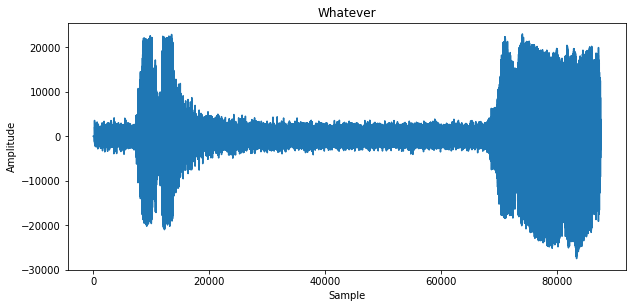

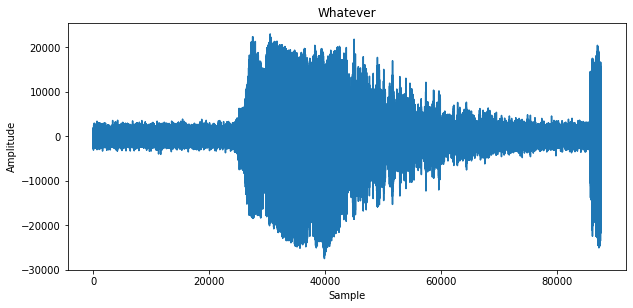

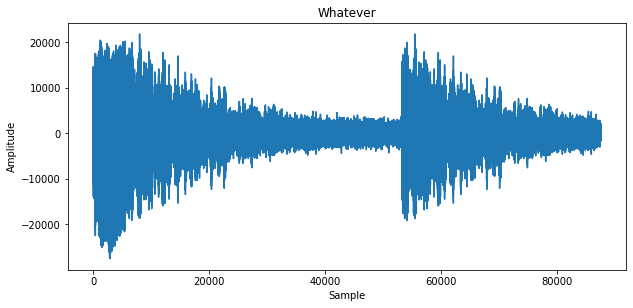

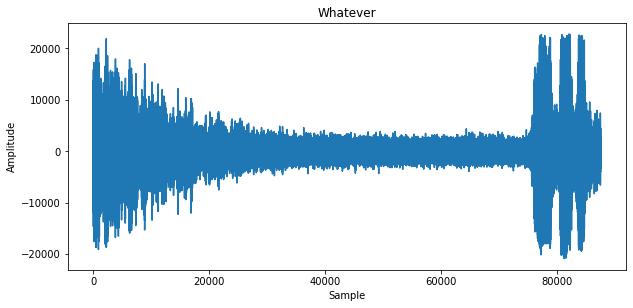

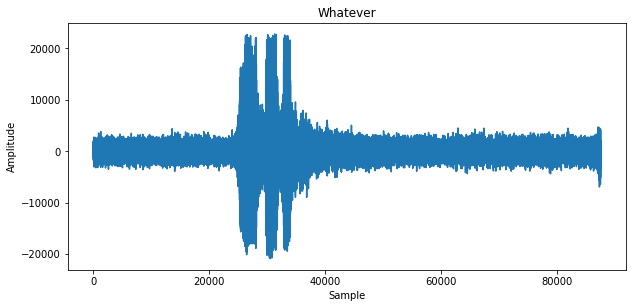

In [111]:
import matplotlib.pyplot as plot
from scipy.io import wavfile
# Read the wav file (mono)


for i in range (l):
    z = str(i)
    fileToLoad = dict()
    fileToLoad = "/media/tegwyn/Xavier_SD/Bat_Detecter/test01/played_together" + str(i) + ".wav"
    # print(fileToLoad)
    if i > 0:
        #samplingFrequency, signalData = wavfile.read('/media/tegwyn/Xavier_SD/Bat_Detecter/test01/processed3')
        samplingFrequency, signalData = wavfile.read(
            fileToLoad
            )

        # Plot the signal read from wav file
        plot.rcParams['figure.figsize'] = [10, 10]
        
        plot.subplot(211)

        plot.title('Whatever')

        plot.plot(signalData)
        plot.xlabel('Sample')
        plot.ylabel('Amplitude')


        # plot.subplot(212)

        # plot.specgram(signalData,Fs=samplingFrequency)
        # plot.xlabel('Time, seconds')
        # plot.ylabel('Frequency')

        plot.show()